In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('financial_data_cleaned.csv')

In [3]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.0,32370.0,16185.0,16185.0,01-01-2014,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.0,26420.0,13210.0,13210.0,01-01-2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.0,32670.0,21780.0,10890.0,06-01-2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.0,13320.0,8880.0,4440.0,06-01-2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.0,37050.0,24700.0,12350.0,06-01-2014,6,June,2014


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Segment              700 non-null    object 
 1   Country              700 non-null    object 
 2   Product              700 non-null    object 
 3   Discount Band        700 non-null    object 
 4   Units Sold           700 non-null    float64
 5   Manufacturing Price  700 non-null    float64
 6   Sale Price           700 non-null    float64
 7   Gross Sales          700 non-null    float64
 8   Discounts            700 non-null    float64
 9   Sales                700 non-null    float64
 10  COGS                 700 non-null    float64
 11  Profit               700 non-null    float64
 12  Date                 700 non-null    object 
 13  Month Number         700 non-null    int64  
 14  Month Name           700 non-null    object 
 15  Year                 700 non-null    int

In [5]:
df.isnull().sum()

Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
Sales                  0
COGS                   0
Profit                 0
Date                   0
Month Number           0
Month Name             0
Year                   0
dtype: int64

In [6]:
df.dtypes

Segment                 object
Country                 object
Product                 object
Discount Band           object
Units Sold             float64
Manufacturing Price    float64
Sale Price             float64
Gross Sales            float64
Discounts              float64
Sales                  float64
COGS                   float64
Profit                 float64
Date                    object
Month Number             int64
Month Name              object
Year                     int64
dtype: object

data cleaning

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.dtypes

Segment                        object
Country                        object
Product                        object
Discount Band                  object
Units Sold                    float64
Manufacturing Price           float64
Sale Price                    float64
Gross Sales                   float64
Discounts                     float64
Sales                         float64
COGS                          float64
Profit                        float64
Date                   datetime64[ns]
Month Number                    int64
Month Name                     object
Year                            int64
dtype: object

EDA

In [11]:
#total units sold
np.average(df['Units Sold'])

1608.2942857142857

In [12]:
#total revenue
np.sum(df['Sales'])

118726350.27000001

In [13]:
#total profits
np.sum(df['Profit'])

16893702.25

matplotlib

In [15]:
print(df['Sales'].skew())

1.6962952165678427


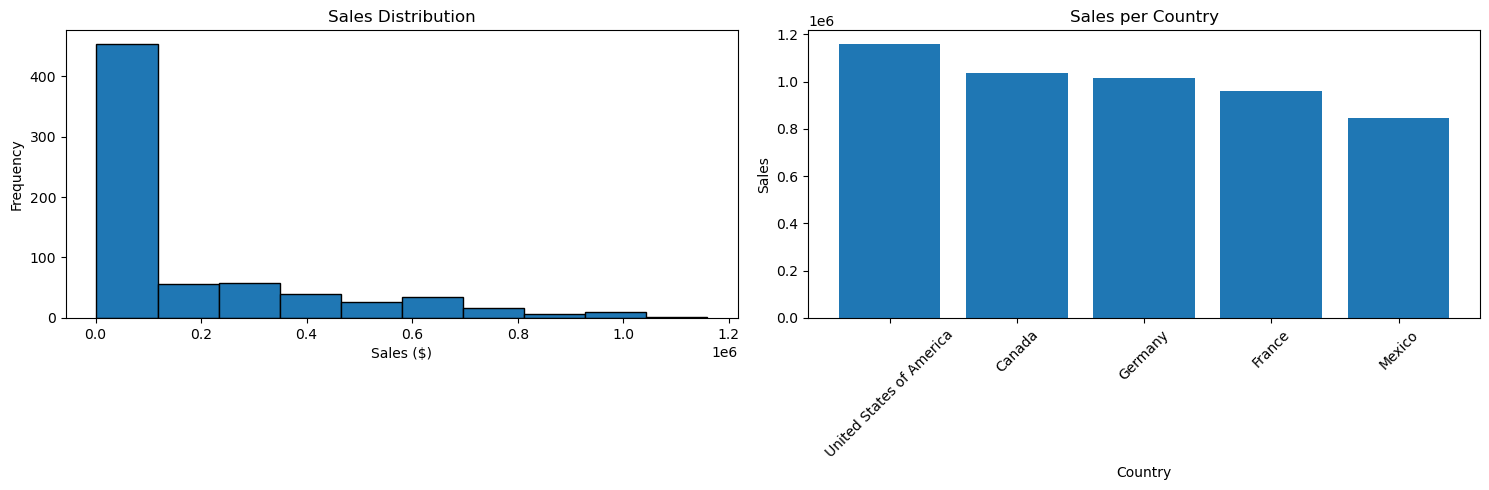

In [16]:
# Create figure with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# -------- Histogram --------
ax[0].hist(df['Sales'], bins=10, edgecolor='black')
ax[0].set_title('Sales Distribution')
ax[0].set_xlabel('Sales ($)')
ax[0].set_ylabel('Frequency')

# -------- Bar Chart --------
# Sort by Sales in descending order
df_sorted = df.sort_values(by='Sales', ascending=False)

# Plot on second axis
bars = ax[1].bar(df_sorted['Country'], df_sorted['Sales'])
ax[1].set_title('Sales per Country')
ax[1].set_xlabel('Country')
ax[1].set_ylabel('Sales')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

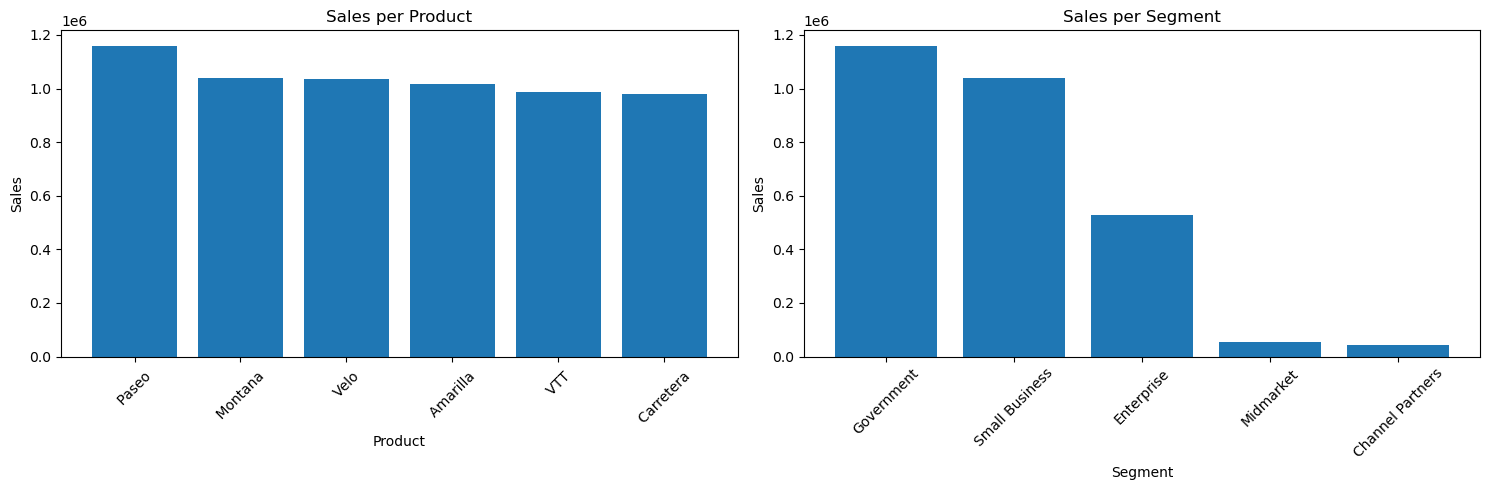

In [17]:
# Sort dataframe by Sales in descending order
df_sorted = df.sort_values(by='Sales', ascending=False)

# Create subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# --- Sales per Product ---
ax[0].bar(df_sorted['Product'], df_sorted['Sales'])
ax[0].set_title('Sales per Product')
ax[0].set_xlabel('Product')
ax[0].set_ylabel('Sales')
ax[0].tick_params(axis='x', rotation=45)

# --- Sales per Segment ---
ax[1].bar(df_sorted['Segment'], df_sorted['Sales'])
ax[1].set_title('Sales per Segment')
ax[1].set_xlabel('Segment')
ax[1].set_ylabel('Sales')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


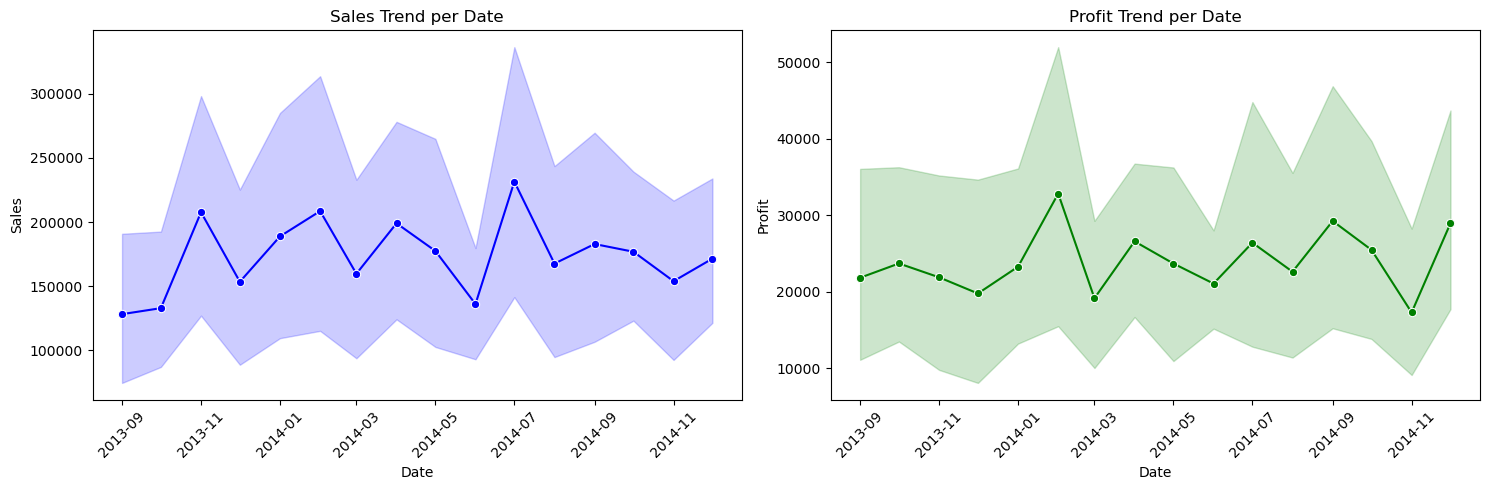

In [18]:
df = df.sort_values('Date')

# Create subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharex=True)

# --- Sales ---
sns.lineplot(data=df, x='Date', y='Sales', marker='o', ax=ax[0], color='blue')
ax[0].set_title('Sales Trend per Date')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Sales')

# --- Profit ---
sns.lineplot(data=df, x='Date', y='Profit', marker='o', ax=ax[1], color='green')
ax[1].set_title('Profit Trend per Date')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Profit')

# Rotate x-axis labels for both subplots
for a in ax:
    a.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()